# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 3: Regresión

__Número de grupo: 26__

__Nombres de los estudiantes: César Ureña y Alejandro González__

En este notebook trabajaremos con una colección de datos de alquileres de Airbnb en Amsterdam. El objetivo de este problema es entrenar una red neuronal capaz de predecir el precio del alojamiento a partir de un conjunto de características.

In [24]:
RANDOM_STATE=333

## 1) Descripción de los datos

Carga el fichero de datos `airbnb.csv` en un dataframe. Describe el conjunto de datos y trata de interpretar el significado de cada una de las variables. Estudia la distribución de precios.

In [25]:
import pandas as pd
import numpy as np

In [26]:
filename = "airbnb.csv"
airbnb = pd.read_csv(filename)
airbnb

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
0,4,2.0,2.0,1,1.0,52.358466,4.933843,2,8,3.279483,0,1,0,0,160.0
1,4,1.0,2.0,2,1.0,52.363589,4.983353,3,0,5.951843,0,1,0,0,120.0
2,2,1.0,1.0,1,1.0,52.375209,4.861647,3,8,2.601055,0,1,0,0,99.0
3,2,1.0,1.0,1,1.0,52.387382,4.890457,2,41,1.095138,0,0,1,0,100.0
4,2,1.0,1.0,1,1.0,52.384062,4.889877,3,0,0.844491,0,1,0,0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,43.0,52.382970,4.873389,3,10,1.815773,0,1,0,0,140.0
14994,4,1.0,2.0,1,1.0,52.347479,4.833644,4,2,5.687407,1,1,0,0,120.0
14995,2,1.0,1.0,1,1.0,52.370400,4.918489,1,5,1.620395,0,1,0,0,120.0
14996,3,1.0,1.0,1,1.0,52.389637,4.879580,2,7,1.777881,0,1,0,0,95.0


Vemos que los datos representan diferentes airbnb, concretamente 14998 con 15 variables cada uno. Estas representan el numero de personas que caben, el número de baños, habitaciones, cuantas personas incluidas en el precio, cuantas veces ha sido ocupado, su localización con latitud y longitud, el mínimo de noches que hay que estar, numero de opiniones sobre él, distancia al centro de la ciudad, si se puede o no reservar al instante, si es una casa entera o solo alguna habitación, si es una habitación privada en el caso de no ser una casa entera o si es compartida y el precio por noche.

In [27]:
airbnb["price"].describe(include='all')

count    14998.000000
mean       130.050273
std         63.820328
min         19.000000
25%         89.000000
50%        115.000000
75%        150.000000
max        440.000000
Name: price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

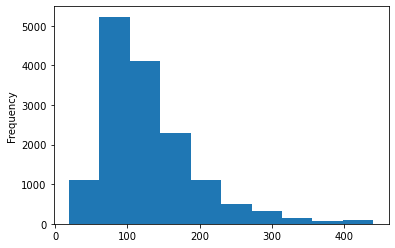

In [28]:
airbnb["price"].plot.hist()

Vemos que la distribución del precio se centra principalmente desde unos 70 hasta 150. La media es 130 que esta entre estos dos valores y el percentil 25% es 90 y el 75% es 150. Hay muy pocos airbnb con un precio cercano al mínimo y menos aun con un precio cercano al máximo ya que esto es algo que casi nadie se puede permitir.

## 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga el precio y, además, las variables que estén relacionadas con él por un valor de correlacción de al menos 0.2 (de forma directa o inversa).

In [29]:
correl = airbnb.corr(method='pearson')
correl

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
accommodates,1.000000,0.342195,0.684226,0.495278,0.035877,0.019741,0.108009,0.008339,-0.031397,0.052256,0.001548,0.249384,-0.249088,-0.012872,0.552183
bathrooms,0.342195,1.000000,0.365951,0.228522,0.061330,0.014002,0.054273,0.008710,-0.030784,0.011396,0.019624,0.018378,-0.015951,-0.016196,0.283759
bedrooms,0.684226,0.365951,1.000000,0.397340,0.002439,0.002976,0.093538,0.028415,-0.096479,0.105061,-0.055236,0.242817,-0.239698,-0.030479,0.517237
guests_included,0.495278,0.228522,0.397340,1.000000,-0.027165,0.012679,0.067807,0.000536,0.063316,0.024110,-0.020698,0.123286,-0.120377,-0.023878,0.338739
host_listings_count,0.035877,0.061330,0.002439,-0.027165,1.000000,0.011374,0.007864,0.012551,-0.044428,-0.049033,0.205426,0.041292,-0.040185,-0.008841,0.109141
latitude,0.019741,0.014002,0.002976,0.012679,0.011374,1.000000,-0.130823,-0.008551,0.042507,-0.574523,0.018967,0.020318,-0.020974,0.003260,0.027922
longitude,0.108009,0.054273,0.093538,0.067807,0.007864,-0.130823,1.000000,0.008336,-0.010590,0.068103,0.030362,-0.007145,0.004975,0.014071,0.035887
minimum_nights,0.008339,0.008710,0.028415,0.000536,0.012551,-0.008551,0.008336,1.000000,-0.019435,0.000555,-0.019693,0.044669,-0.043631,-0.008554,0.007708
number_of_reviews,-0.031397,-0.030784,-0.096479,0.063316,-0.044428,0.042507,-0.010590,-0.019435,1.000000,-0.069880,0.081796,-0.261675,0.263597,-0.000648,-0.088437
distance_centre,0.052256,0.011396,0.105061,0.024110,-0.049033,-0.574523,0.068103,0.000555,-0.069880,1.000000,-0.006114,-0.092336,0.091778,0.007612,-0.204698


In [30]:
new = correl[abs(correl['price']) > 0.2]['price']
new

accommodates       0.552183
bathrooms          0.283759
bedrooms           0.517237
guests_included    0.338739
distance_centre   -0.204698
entire_home        0.361313
private_room      -0.357184
price              1.000000
Name: price, dtype: float64

Vemos que las variables que estan relacionadas de forma directa o inversa por mas de 0.2 son: El número de personas que entran que tiene sentido ya que muchas veces se cobra el precio por persona, el número de baños y dormitorios que normalmente esta relacionado con la gente que entra en una casa para poder repartise bien, el número de personas incluidas en el precio, distancia al centro negativamente ya que cuanto menos distancia al centro, mejor para los huéspedes y más caro. Tener una casa para ti solo normalmente se suele cobrar más caro que compartirla con más personas desconocidas, habitación privada también en correlacion negativa ya que entiendo que esto significa que no tienes una casa para ti solo con lo que es justo la relación anterior de casa para ti solo en negativo.

Estas variables las vamos a incluir como variables de entrenamiento para nuestra red neuronal.

In [31]:
dp_airbnb = airbnb.copy()
dp_airbnb = dp_airbnb.drop(dp_airbnb.columns.difference(['accommodates','bathrooms','bedrooms','guests_included','distance_centre','entire_home','private_room']), axis=1)
p_airbnb = airbnb.copy()
p_airbnb = p_airbnb.drop(p_airbnb.columns.difference(['price']), axis=1)
dp_airbnb

,accommodates,bathrooms,bedrooms,guests_included,distance_centre,entire_home,private_room
0,4,2.0,2.0,1,3.279483,1,0
1,4,1.0,2.0,2,5.951843,1,0
2,2,1.0,1.0,1,2.601055,1,0
3,2,1.0,1.0,1,1.095138,0,1
4,2,1.0,1.0,1,0.844491,1,0
...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,1.815773,1,0
14994,4,1.0,2.0,1,5.687407,1,0
14995,2,1.0,1.0,1,1.620395,1,0
14996,3,1.0,1.0,1,1.777881,1,0


## 3) Normalización

Decide si debes o no normalizar los datos. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.

Si decides escalar los datos deberás crear dos `scalers` distintos, uno para el array con la descripción de los pisos y otro para el array con el precio. Lo hacemos de este modo porque así podremos desescalar las predicciones más fácilmente.

In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Reescalamos las variables de entrada
scalerPrecio = MinMaxScaler()
scalerPrecio.fit(dp_airbnb)
pisos_scaled = scalerPrecio.transform(dp_airbnb)

#Variable de salida
p_airbnb_cpy = p_airbnb.copy()

scalerPrecioSalida = MinMaxScaler()
scalerPrecioSalida.fit(np.array(p_airbnb_cpy).reshape(-1,1)) # Como es una sola variable es necesario ponerlo en modo columna
targetPrecio_scaled=scalerPrecioSalida.transform(np.array(p_airbnb_cpy).reshape(-1,1))

Decidimos normalizar los datos reescalando utilizando MinMaxScaler() para que el entrenamiento converja más rapidamentey evitar mínimos locales. Lo hacemos para los dos arrays por separado, uno es el que hemos creado a partir de las correlaciones mayores de +-0.2 de las variables con el precio y el otro es solamente con el precio.

## 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 200 neuronas
- La segunda con dos capas ocultas cada una de 100 neuronas

Pinta la curva de aprendizaje para cada red variando el parámetro `alpha` que controla el coeficiente de regularización L2 y determina el valor óptimo usando validación cruzada. Asegúrate de que no salen warnings indicando que no se ha alcanzado la convergencia durante el entrenamiento (basta con poner un número de max_iter suficientemente grande).

¿Alguna de las dos redes domina a la otra? ¿Por qué crees que se producen las diferencias?

In [46]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, pisos_scaled, targetPrecio_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.012678058326870708,
  -0.012226656573093376,
  -0.01227486731648672,
  -0.01225004077782114,
  -0.012243364484804887,
  -0.012228302978063621],
 [0.0003966419209094001,
  0.00027398866706305716,
  0.00020223707355082873,
  0.00020722075014518695,
  0.0002049348239465782,
  0.00021794733926554157])

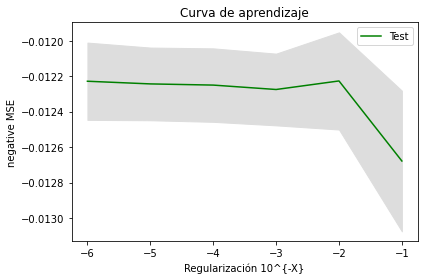

In [47]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [44]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, pisos_scaled, targetPrecio_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.012723697054611205,
  -0.011979667476459645,
  -0.011740184971338063,
  -0.011704574246138705,
  -0.01169437301714911,
  -0.01175465244045318],
 [0.0003885895981672428,
  0.0003546605235645444,
  0.0004269019094578842,
  0.00044308683145133766,
  0.00043602684046625774,
  0.00045943793468267077])

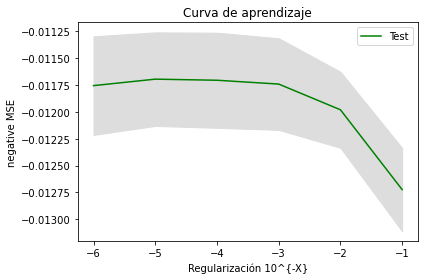

In [45]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Ninguna de las dos redes domina a la otra. La red con dos capas ocultas de 100 neuronas parece tener el mejor valor (el más cercano a 0) de las dos redes aunque no por una diferencia notable. La primera es más estable en los valores de alpha de 10^{-6} a 10^{-2} pero ambas redes caen al mismo valor en el coeficiente de regularizacion para alpha 10^{-1}. La red con una sola capa oculta cambia más bruscamente ya que es posible que al tener una capa, los resultados varien rápidamente de un coeficiente de regularizacion a otro. Al tener dos capas ocultas, los datos pasan de una a otra dando lugar a un contraste entre los datos que con una no teníamos.

## 5) Medición del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción del valor de todos los establecimientos usando validación cruzada. ¿Cuál es el error medio del modelo en euros? ¿Crees que el modelo es suficientemente bueno?

Pinta la distribución del error en euros y el diagrama de dispersión de la predicción frente al valor real. ¿El modelo comete los mismos tipos de errores en establecimientos de distintos precios? ¿Por qué crees que se producen esos errores?

In [64]:
from sklearn.model_selection import cross_val_predict

# Creamos el clasificador
regul_param=0.1
mlp = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
# estimamos 
predicts_scaled = cross_val_predict(mlp, pisos_scaled, targetPrecio_scaled.ravel(), cv=10)

# desescalamos las predicciones para que estén en la escala original
predicts=scalerPrecioSalida.inverse_transform(predicts_scaled.reshape(-1,1))

In [65]:
errors = np.abs(p_airbnb_cpy - predicts) # error en cada ejemplo
mean_error = np.mean(errors)
std_error = np.std(errors)
mean_price = np.mean(p_airbnb_cpy)

print('Error medio:', mean_error)
print('Desviación típica:', std_error)
print('Error medio en %:', mean_error/mean_price*100)

Error medio: price    33.527496
dtype: float64
Desviación típica: price    33.405095
dtype: float64
Error medio en %: price    25.780412
dtype: float64


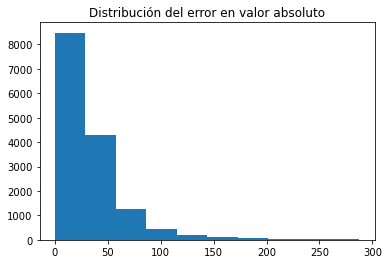

In [66]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(errors)

plt.title('Distribución del error en valor absoluto')
plt.show()

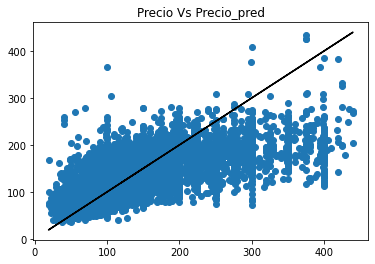

In [70]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(airbnb.price, predicts) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(airbnb_cpy.price, airbnb_cpy.price, color='k') 

plt.title('Precio Vs Precio_pred')
plt.show()

Vemos que el error medio es de 33 euros aproximadamente, junto con una deviación típica de 33 también. El error medio en porcentaje es el 25% del precio real. Vemos que la distribución del error medio esta principalmente entre 0 y 50, siendo los errores por encima de 50 bastante poco comunes. Este es un error que puede resultar bastante grande si el precio real esta cerca del error que ha cometido la red. Si el precio fuese muy alto, el error no sería tan significativo. 

Analizando el diagrama de dispersión del precio real y el precio predicho, vemos que el error es mucho más grande cuando se trata de predecir el precio de los alojamientos más caros(a partir de 200). El precio normalmente lo pone muy por debajo de lo que realmente es.

Esto se puede deber a que muchas veces, los alojamientos más caros no tienen más cosas que los que son más baratos. Los alojamientos más caros pueden serlo porque sean de lujo o tengan variables que aquí no aparecen ya que los más baratos no tienen que suban el precio. Esta red se podría mejorar usando más datos (más variables) para tener más en que comparar con los más caros. Un apartamento de lujo o en una ciudad muy cara, alomejor tiene el mismo número de habitaciones o el mismo numero de baños, distancia al centro, capacidad... que puede tener uno muy barato.